In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama
from IPython.display import Image

In [2]:
model=ChatOllama(model='qwen3:8b')

In [3]:
#create state 
class WriteBlogState(TypedDict):

    topic: str
    outline: str
    blog_post: str

In [4]:
# create node  for outline using topic
def create_outline(state:WriteBlogState)->WriteBlogState:
    topic=state['topic']
    promot=f"Create a detailed outline for a blog post on the topic: {topic}"
    response=model.invoke(promot)
    return {"outline": response.content}

In [5]:
#create node for blog post using outline
def create_blog_post(state:WriteBlogState)->WriteBlogState:
    outline=state['outline']
    promot=f"Write a blog post based on the following outline: {outline}"
    response=model.invoke(promot)
    return {"blog_post": response.content}


In [6]:
graph=StateGraph(WriteBlogState)

graph.add_node("create_outline", create_outline)
graph.add_node("create_blog_post", create_blog_post)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog_post")
graph.add_edge("create_blog_post", END)


In [7]:
workflow=graph.compile()

In [ ]:
result=workflow.invoke({"topic":"The benefits of exercise for mental health"})


AttributeError: 'str' object has no attribute 'content'

In [10]:
print(result['blog_post'])

**The Benefits of Exercise for Mental Health**  

---

### **I. Introduction**  
Did you know that **1 in 5 adults experience mental health issues**? While therapy, medication, and mindfulness practices are vital, there’s a powerful, accessible tool that can significantly improve well-being: **exercise**. Physical activity isn’t just for building strength or shedding pounds—it’s a natural remedy for stress, anxiety, depression, and more.  

The connection between movement and mental health is rooted in science, yet its impact is often underestimated. From boosting brain chemistry to fostering social connections, exercise offers a holistic approach to nurturing mental wellness. In this post, we’ll explore how physical activity can transform your mental health, backed by research and real-life stories.  

---

### **II. The Science Behind Exercise and Mental Health**  
Exercise influences mental health through a complex interplay of biological and psychological mechanisms. Let’s break it

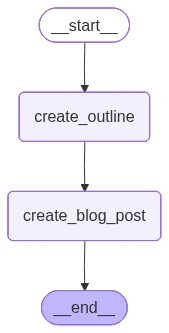

In [13]:
# print the graph
Image(workflow.get_graph().draw_mermaid_png())